<a href="https://colab.research.google.com/github/MfmRifath/TesorflowCourseDeepLearning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Network in Tensorflow

There are many definitions for a regression problem but in our case we are going to simplify it:predicting a numericl variable base on some other combinations of variables. even shorter predicting a number.

In [1]:
#impoort tensoflow
import tensorflow as tf
print(tf.__version__)

2.17.1


#Crating Data to view and Fit

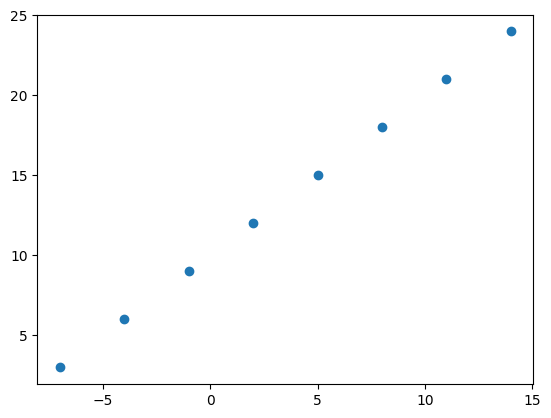

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create the features
X=np.array([-7.0,-4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Lables
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


#Visualize it
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# INPUT AND OUTPUT SHAPES

CREATE THE DEMO TENSOR FOR OUR HOUSING PRICING PREDICTIONS PROBLEM


In [4]:
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

((), ())

In [7]:
#Turn our NumPy Arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

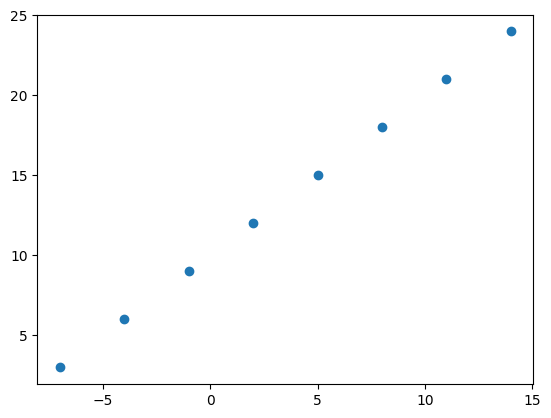

In [9]:
plt.scatter(X,y)

#Steps in modelling with TensorFlow

1. **Creating a Model** - define the input and output layers as well as the hidden layers of a Deep Learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns it's learing ) and Evaluations Matrices (what we can use to interpret the performence of our model)
3. Fitting a model - letting the model try to find the patterns between X & y (Features and Lables)

In [10]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent
    metrics=["mae"]
)

# 3. Fit the model
#Reshape X to have an extra dimension for batch size using tf.expand_dims
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # The axis=-1 argument specifies that the new dimension should be added as the last dimension of the tensor.

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8.4831 - mae: 8.4831
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - loss: 8.3506 - mae: 8.3506
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 8.2181 - mae: 8.2181
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.0856 - mae: 8.0856
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.9531 - mae: 7.9531


In [11]:
# Check out X and Y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Try and make a prediction using our model
prediction = model.predict(np.array([17.0]))
print(prediction) # Print the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
[[27.392805]]


In [13]:
prediction + 14

array([[41.392807]], dtype=float32)

## Improve Our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) with in each of the hidden layers, Change the activation funtion of the each layer.

2. **Compiling a Model** - Here we might change the  optimization function or perhaps the **learing rates** of the Optimization function.

3. **Fitting a Model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from ).

In [15]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model(this time we will train for longer )
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.5301 - mae: 11.5301
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 11.3976 - mae: 11.3976
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.2651 - mae: 11.2651
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 11.1326 - mae: 11.1326
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 11.0001 - mae: 11.0001
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 10.8676 - mae: 10.8676
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 10.7351 - mae: 10.7351
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 10.6026 - mae: 10.6026
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 10.4701 - mae: 10.4701
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.3376 - mae: 10.3376
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 10.2051 - mae: 10.2051
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 10.0726 - mae: 10.0726
Epoch 13/100
1/1 ━━━

In [16]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [21]:
# let's see if our model's predictions has improved
# Convert the input to a NumPy array
input_data = np.array([[17.0]])  # Ensure it's 2D if required by the model
predictions = model.predict(input_data)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[30.0358]]


In [27]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Use 'learning_rate' instead of 'lr'
    metrics=["mae"]
)

# 3. Fit the model (training for 100 epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.4866 - mae: 12.4866
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 11.7080 - mae: 11.7080
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.9126 - mae: 10.9126
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.1204 - mae: 10.1204
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.4620 - mae: 9.4620
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 8.8761 - mae: 8.8761
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.2558 - mae: 8.2558
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.6071 - mae: 7.6071
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.9292 - mae: 6.9292
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 6.2219 - mae: 6.2219
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 5.4808 - mae: 5.4808
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 4.7043 - mae: 4.7043
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [28]:
# Convert the input to a NumPy array
input_data = np.array([[17.0]])  # Ensure it's 2D if required by the model
predictions = model.predict(input_data)

print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[26.638159]]


## Evaluating a model